In [1]:
import patsy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
#To show matplotlib inline


In [2]:

rng = pd.date_range('1/1/2011', periods=72, freq='H')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
full=ts.to_frame()

In [3]:
ts.head()


2011-01-01 00:00:00    1.431491
2011-01-01 01:00:00    0.202853
2011-01-01 02:00:00    0.129711
2011-01-01 03:00:00   -2.437267
2011-01-01 04:00:00   -0.942471
Freq: H, dtype: float64

In [4]:
#  Return a series where the absolute difference 
#  between a number and the next number in the series is less than .5
less_than_a_half=ts[abs(ts.diff(periods=1))<.5]
print less

(array([-1.5, -1. , -0.5,  0. ,  0.5,  1. ,  1.5,  2. ]),
 <a list of 8 Text yticklabel objects>)

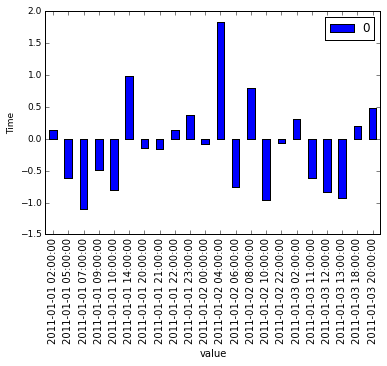

In [5]:
#Plot and show a Histogram of the Series
df=less_than_a_half.to_frame()
df.plot(kind='bar')
plt.xlabel('value')
plt.ylabel("Time", fontsize=9) 
plt.yticks(fontsize=9)  


In [6]:
df.info()
df[0]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22 entries, 2011-01-01 02:00:00 to 2011-01-03 20:00:00
Data columns (total 1 columns):
0    22 non-null float64
dtypes: float64(1)
memory usage: 352.0 bytes


2011-01-01 02:00:00    0.129711
2011-01-01 05:00:00   -0.609605
2011-01-01 07:00:00   -1.107266
2011-01-01 09:00:00   -0.497354
2011-01-01 10:00:00   -0.804275
2011-01-01 14:00:00    0.988065
2011-01-01 20:00:00   -0.137475
2011-01-01 21:00:00   -0.162538
2011-01-01 22:00:00    0.137690
2011-01-01 23:00:00    0.379468
2011-01-02 00:00:00   -0.075272
2011-01-02 04:00:00    1.826147
2011-01-02 06:00:00   -0.758303
2011-01-02 08:00:00    0.789749
2011-01-02 10:00:00   -0.962697
2011-01-02 22:00:00   -0.068016
2011-01-03 02:00:00    0.308145
2011-01-03 11:00:00   -0.609028
2011-01-03 12:00:00   -0.840415
2011-01-03 13:00:00   -0.932360
2011-01-03 18:00:00    0.198238
2011-01-03 20:00:00    0.477858
Name: 0, dtype: float64

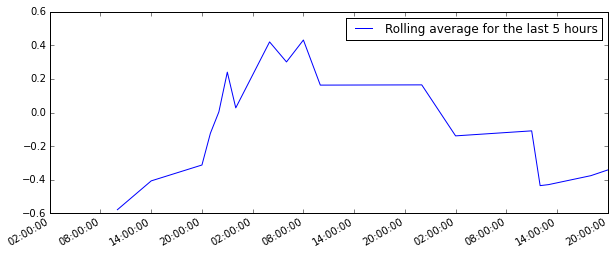

In [7]:
#  * Give me the rolling average of the series 
#  over the last 5 hours in a new column on a DataFrame

col_name = "Rolling average for the last 5 hours" 
df[col_name]=pd.rolling_mean(df[0],5)
df[[col_name]].plot(subplots=False,figsize=(10,4))

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 22 entries, 2011-01-01 02:00:00 to 2011-01-03 20:00:00
Data columns (total 2 columns):
0                                       22 non-null float64
Rolling average for the last 5 hours    18 non-null float64
dtypes: float64(2)
memory usage: 528.0 bytes


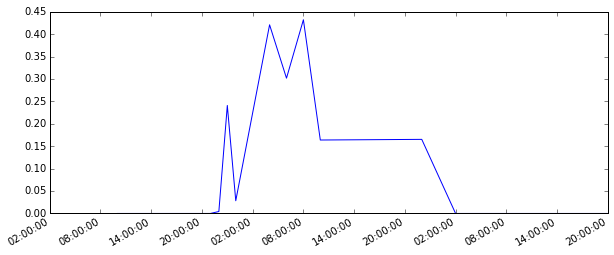

In [9]:
#  Change any negative numbers in the new rolling average column to 0
def positive_convert(x):
    if x <0:
        return 0
    else:
        return x
df['Rolling average for the last 5 hours']=df["Rolling average for the last 5 hours"].apply(positive_convert)
df['Rolling average for the last 5 hours'].plot(subplots=False,figsize=(10,4))

In [10]:
# * Take your DataFrame and put it into Excel.
#         * Make the width of the columns 20
#         * Hide the gridlines on the excel sheet

writer = pd.ExcelWriter('output.xlsx',engine='xlsxwriter')
df.to_excel(writer,'Sheet1')
writer.save()